In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [138]:
df = pd.read_csv("high.csv")
models = ["Neg", "Pack", "Sig", "Seq", "FCNet"]
metrics = ["L1", "MSE", "RMSE"]
pat = '|'.join(models)
s = df['Nets'].str.extract('('+ pat + ')', expand=False)
groups = df.groupby(s)

[0.39 0.39 0.5 ]
[0.73 0.74 0.74]
[0.74 0.78 0.77]
[0.75 0.76 0.78]
[0.6  0.65 0.64]


<Axes: title={'center': 'R2 score for high volume type'}>

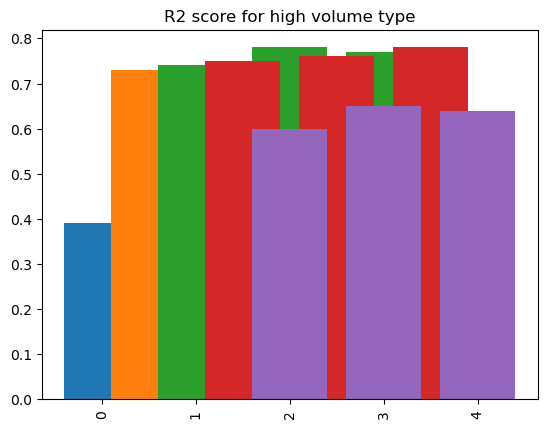

In [150]:
fig, ax = plt.subplots()
labels = df["Nets"].str.replace("\r\n Trained with ", "_")
r2_scores = df["Mean\r\n R2\r\n Score"]
bar_width = 0.5
x = np.arange(len(metrics))*1.5


for kk, (name, group) in enumerate(groups):
    #labels = group["Nets"].str.replace("\r\n Trained with ", "_")
    r2_scores = group["Mean\r\n R2\r\n Score"].values
    print(r2_scores)
    ax.bar(x + (kk*bar_width), r2_scores)
#colors = ["brown" if val == max(r2_scores) else "bisque" if val == sorted(r2_scores, reverse=True)[2] else "cornflowerblue" for val in r2_scores]

#bar = ax.bar(labels, r2_scores, align="edge", width=0.3, color=colors)
#ax.bar_label(bar, fontsize=8, padding=4)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
ax.set_title("R2 score for high volume type")
ax